# EDA

- The os module has a perfect method to list files in a directory.
- Pandas json normalize could work here but is not necessary to convert the JSON data to a dataframe.
- You may need a nested for-loop to access each sale!
- We've put a lot of time into creating the structure of this repository, and it's a good example for future projects.  In the file functions_variables.py, there is an example function that you can import and use.  If you have any variables, functions or classes that you want to make, they can be put in the functions_variables.py file and imported into a notebook.  Note that only .py files can be imported into a notebook. If you want to import everything from a .py file, you can use the following:
```python
from functions_variables import *
```
If you just import functions_variables, then each object from the file will need to be prepended with "functions_variables"\
Using this .py file will keep your notebooks very organized and make it easier to reuse code between notebooks.

In [133]:
import pandas as pd
import numpy as np
import os
import json
from pprint import pprint

from modules.functions_variables import * 

import matplotlib.pyplot as plt
import seaborn as sns

# Self defined functions for EDA
from modules.EDA_Functions import keep_keys, find_drop_keys, parse_json_data


## Data Importing

In [9]:
# loading one file first to see what type of data we are dealing with and what attributes it has
AKJ0 = json.load(open(r'../raw_data/AK_Juneau_0.json','r'))

In [10]:
# Explore json list dictionary keys
print(AKJ0.keys())
print(AKJ0['status'])
print(AKJ0['data'].keys())
print(len(AKJ0['data']['results']))
print(AKJ0['data']['results'][0].keys())

dict_keys(['status', 'data'])
200
dict_keys(['total', 'count', 'results'])
8
dict_keys(['primary_photo', 'last_update_date', 'source', 'tags', 'permalink', 'status', 'list_date', 'open_houses', 'description', 'branding', 'list_price', 'lead_attributes', 'property_id', 'photos', 'flags', 'community', 'products', 'virtual_tours', 'other_listings', 'listing_id', 'price_reduced_amount', 'location', 'matterport'])


In [11]:
# List Dictonary of results
# [
#     {
#         "primary_photo": {
#             "href": "https://ap.rdcpix.com/07097d34c98a59ebb799688986ef271dl-m2867511255s-w1024_h768.jpg"
#         },
#         'last_update_date": "2023-09-19T20:52:50Z",
#         "source": {
#             "plan_id": None,
#             "agents": [
#                 {"office_name": "EXP Realty LLC - Southeast Alaska"},
#                 {"office_name": "Non-Member Office"}
#             ],
#             "spec_id": None,
#             "type": "mls"
#         },
#         "tags": [
#             "carport", "community_outdoor_space", "cul_de_sac", "family_room",
#             "hardwood_floors", "hill_or_mountain_view", "recreation_facilities",
#             "rv_or_boat_parking", "basement", "garage_1_or_more", "two_or_more_stories",
#             "big_yard", "high_ceiling", "efficient", "trails", "shopping"
#         ],
#         "permalink": "9453-Herbert-Pl_Juneau_AK_99801_M90744-30767",
#         "status": "sold",
#         "list_date": "2023-06-29T21:16:25.000000Z",
#         "open_houses": None,
#         "description": {
#             "year_built": 1963,
#             "baths_3qtr": None,
#             "sold_date": "2023-09-18",
#             "sold_price": None,
#             "baths_full": 2,
#             "name": None,
#             "baths_half": None,
#             "lot_sqft": 10454,
#             "sqft": 1821,
#             "baths": 2,
#             "sub_type": None,
#             "baths_1qtr": None,
#             "garage": 1,
#             "stories": None,
#             "beds": 3,
#             "type": "single_family"
#         },
#         "branding": [
#             {
#                 "name": "EXP Realty LLC - Southeast Alaska",
#                 "photo": None,
#                 "type": "Office"
#             }
#         ],
#         "list_price": 554950,
#         "lead_attributes": {
#             "show_contact_an_agent": True
#         },
#         "property_id": "9074430767",
#         "photos": [
#             {
#                 "tags": [
#                     {"label": "house_view", "probability": 0.9931892156601},
#                     {"label": "road_view", "probability": 0.84215885400772},
#                     {"label": "house_view", "probability": 0.93829786777496}
#                 ],
#                 "href": "https://ap.rdcpix.com/07097d34c98a59ebb799688986ef271dl-m2867511255s-w1024_h768.jpg"
#             },
#             {
#                 "tags": [
#                     {"label": "living_room", "probability": 0.99856203794479}
#                 ],
#                 "href": "https://ap.rdcpix.com/07097d34c98a59ebb799688986ef271dl-m2021977128s-w1024_h768.jpg"
#             },
#             {
#                 "tags": [
#                     {"label": "dining_room", "probability": 0.99998116493225}
#                 ],
#                 "href": "https://ap.rdcpix.com/07097d34c98a59ebb799688986ef271dl-m2832281708s-w1024_h768.jpg"
#             },
#             {
#                 "tags": [
#                     {"label": "unknown", "probability": 0.91968685388565}
#                 ],
#                 "href": "https://ap.rdcpix.com/07097d34c98a59ebb799688986ef271dl-m2250208436s-w1024_h768.jpg"
#             },
#             {
#                 "tags": [
#                     {"label": "kitchen", "probability": 0.99999892711639}
#                 ],
#                 "href": "https://ap.rdcpix.com/07097d34c98a59ebb799688986ef271dl-m4264543754s-w1024_h768.jpg"
#             }
#         ],
#         "flags": {
#             "is_new_construction": None,
#             "is_for_rent": None,
#             "is_subdivision": None,
#             "is_contingent": None,
#             "is_price_reduced": False,
#             "is_pending": None,
#             "is_foreclosure": None,
#             "is_plan": None,
#             "is_coming_soon": None,
#             "is_new_listing": False
#         },
#         "community": None,
#         "products": {
#             "brand_name": "basic_opt_in"
#         },
#         "virtual_tours": None,
#         "other_listings": {
#             "rdc": [
#                 {"listing_id": "2957241843", "listing_key": None, "status": "sold", "primary": True},
#                 {"listing_id": "2957022863", "listing_key": None, "status": "off_market", "primary": None}
#             ]
#         },
#         "listing_id": "2957241843",
#         "price_reduced_amount": 45000,
#         "location": {
#             "address": {
#                 "postal_code": "99801",
#                 "state": "Alaska",
#                 "coordinate": {"lon": -134.59372, "lat": 58.36395},
#                 "city": "Juneau",
#                 "state_code": "AK",
#                 "line": "9453 Herbert Pl"
#             },
#             "street_view_url": "https://maps.googleapis.com/maps/api/streetview?channel=rdc-streetview&client=gme-movesalesinc&location=9453%20Herbert%20Pl%2C%20Juneau%2C%20AK%2099801&size=640x480&source=outdoor&signature=OPv224SjFIJWgVKAXZKZXNYEdNQ=",
#             "county": {"fips_code": None, "name": "Juneau"}
#         },
#         "matterport": False
#     }
# ]


In [12]:
# Working with data frame for one file
from pandas import json_normalize
df = json_normalize(AKJ0['data']['results'])

In [13]:
print(f'There are {len(df.columns)} total keys in the AK_Juneau_0.json file\n')
print(df.columns)

There are 64 total keys in the AK_Juneau_0.json file

Index(['last_update_date', 'tags', 'permalink', 'status', 'list_date',
       'open_houses', 'branding', 'list_price', 'property_id', 'photos',
       'community', 'virtual_tours', 'listing_id', 'price_reduced_amount',
       'matterport', 'primary_photo.href', 'source.plan_id', 'source.agents',
       'source.spec_id', 'source.type', 'description.year_built',
       'description.baths_3qtr', 'description.sold_date',
       'description.sold_price', 'description.baths_full', 'description.name',
       'description.baths_half', 'description.lot_sqft', 'description.sqft',
       'description.baths', 'description.sub_type', 'description.baths_1qtr',
       'description.garage', 'description.stories', 'description.beds',
       'description.type', 'lead_attributes.show_contact_an_agent',
       'flags.is_new_construction', 'flags.is_for_rent',
       'flags.is_subdivision', 'flags.is_contingent', 'flags.is_price_reduced',
       'flags.

In [14]:
# Running self defined functions for one file
keepKeys = keep_keys()

df = parse_json_data(AKJ0['data']['results'],keepKeys)

df.head()

,tags,status,list_date,open_houses,list_price,property_id,listing_id,price_reduced_amount,description.year_built,description.baths_3qtr,...,flags.is_plan,flags.is_coming_soon,flags.is_new_listing,location.address.postal_code,location.address.state,location.address.coordinate.lon,location.address.coordinate.lat,location.address.city,location.address.state_code,location.address.line
0,"[carport, community_outdoor_space, cul_de_sac,...",sold,2023-06-29T21:16:25.000000Z,None,554950.0,9074430767,2957241843,45000.0,1963.0,None,...,None,None,False,99801,Alaska,-134.59372,58.36395,Juneau,AK,9453 Herbert Pl
1,None,sold,None,None,NaN,9424983842,None,NaN,NaN,None,...,None,None,None,99801,Alaska,NaN,NaN,Juneau,AK,8477 Thunder Mountain Rd
2,None,sold,None,None,NaN,9479068516,None,NaN,NaN,None,...,None,None,None,99801,Alaska,NaN,NaN,Juneau,AK,4515 Glacier Hwy
3,None,sold,None,None,NaN,9879331943,None,NaN,NaN,None,...,None,None,None,99801,Alaska,NaN,NaN,Juneau,AK,17850 Point Stephens Rd
4,None,sold,None,None,NaN,9521639574,None,NaN,NaN,None,...,None,None,None,99801,Alaska,NaN,NaN,Juneau,AK,9951 Stephen Richards Memorial Dr


In [ ]:
# loop over all files and put them into a dataframe
directory = r'../raw_data'

keepKeys = keep_keys()
housingData = pd.DataFrame(columns=keepKeys)

for file in os.listdir(directory):
    if file != '.gitkeep':
        result = json.load(open(rf'{directory}/{file}'))

        df = parse_json_data(result['data']['results'],keepKeys)
        housingData = pd.concat([housingData,df],ignore_index=True)

In [ ]:
housingData.head()

,tags,status,list_date,open_houses,description.year_built,description.baths_3qtr,description.sold_date,description.sold_price,description.baths_full,description.name,...,flags.is_new_listing,listing_id,price_reduced_amount,location.address.postal_code,location.address.state,location.address.coordinate.lon,location.address.coordinate.lat,location.address.city,location.address.state_code,location.address.line
0,"[carport, community_outdoor_space, cul_de_sac,...",sold,2023-06-29T21:16:25.000000Z,None,1963.0,NaN,2023-09-18,None,2.0,None,...,False,2957241843,45000.0,99801,Alaska,-134.59372,58.36395,Juneau,AK,9453 Herbert Pl
1,None,sold,None,None,NaN,NaN,2023-08-22,None,NaN,None,...,None,None,NaN,99801,Alaska,NaN,NaN,Juneau,AK,8477 Thunder Mountain Rd
2,None,sold,None,None,NaN,NaN,2023-08-22,None,NaN,None,...,None,None,NaN,99801,Alaska,NaN,NaN,Juneau,AK,4515 Glacier Hwy
3,None,sold,None,None,NaN,NaN,2023-08-21,None,NaN,None,...,None,None,NaN,99801,Alaska,NaN,NaN,Juneau,AK,17850 Point Stephens Rd
4,None,sold,None,None,NaN,NaN,2023-08-21,None,NaN,None,...,None,None,NaN,99801,Alaska,NaN,NaN,Juneau,AK,9951 Stephen Richards Memorial Dr


In [19]:
# Save dataframe to csv
housingData.to_csv('../data/housingDataRaw.csv',index=False)

## Data Cleaning and Wrangling

At this point, ensure that you have all sales in a dataframe.
- Take a quick look at your data (i.e. `.info()`, `.describe()`) - what do you see?
- Is each cell one value, or do some cells have lists?
- What are the data types of each column?
- Some sales may not actually include the sale price (target).  These rows should be dropped.
- There are a lot of NA/None values.  Should these be dropped or replaced with something?
    - You can drop rows or use various methods to fills NA's - use your best judgement for each column 
    - i.e. for some columns (like Garage), NA probably just means no Garage, so 0
- Drop columns that aren't needed
    - Don't keep the list price because it will be too close to the sale price. Assume we want to predict the price of houses not yet listed

In [66]:
# load and concatenate data here
# drop or replace values as necessary
housingData = pd.read_csv('../data/housingDataRaw.csv')

In [67]:
housingData.head()

,tags,status,list_date,open_houses,description.year_built,description.baths_3qtr,description.sold_date,description.sold_price,description.baths_full,description.name,...,flags.is_new_listing,listing_id,price_reduced_amount,location.address.postal_code,location.address.state,location.address.coordinate.lon,location.address.coordinate.lat,location.address.city,location.address.state_code,location.address.line
0,"['carport', 'community_outdoor_space', 'cul_de...",sold,2023-06-29T21:16:25.000000Z,NaN,1963.0,NaN,2023-09-18,NaN,2.0,NaN,...,False,2.957242e+09,45000.0,99801.0,Alaska,-134.59372,58.36395,Juneau,AK,9453 Herbert Pl
1,NaN,sold,NaN,NaN,NaN,NaN,2023-08-22,NaN,NaN,NaN,...,NaN,NaN,NaN,99801.0,Alaska,NaN,NaN,Juneau,AK,8477 Thunder Mountain Rd
2,NaN,sold,NaN,NaN,NaN,NaN,2023-08-22,NaN,NaN,NaN,...,NaN,NaN,NaN,99801.0,Alaska,NaN,NaN,Juneau,AK,4515 Glacier Hwy
3,NaN,sold,NaN,NaN,NaN,NaN,2023-08-21,NaN,NaN,NaN,...,NaN,NaN,NaN,99801.0,Alaska,NaN,NaN,Juneau,AK,17850 Point Stephens Rd
4,NaN,sold,NaN,NaN,NaN,NaN,2023-08-21,NaN,NaN,NaN,...,NaN,NaN,NaN,99801.0,Alaska,NaN,NaN,Juneau,AK,9951 Stephen Richards Memorial Dr


In [68]:
housingData.shape

(8191, 41)

In [69]:
# Dropping all rows with no sold price as they cannot be used with supervised learning.
housingData.dropna(subset=['description.sold_price'],inplace=True)

In [70]:
housingData.info()

<class 'pandas.core.frame.DataFrame'>
Index: 6716 entries, 30 to 8185
Data columns (total 41 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   tags                             6330 non-null   object 
 1   status                           6716 non-null   object 
 2   list_date                        6429 non-null   object 
 3   open_houses                      0 non-null      float64
 4   description.year_built           6041 non-null   float64
 5   description.baths_3qtr           373 non-null    float64
 6   description.sold_date            6716 non-null   object 
 7   description.sold_price           6716 non-null   float64
 8   description.baths_full           6039 non-null   float64
 9   description.name                 0 non-null      float64
 10  description.baths_half           1977 non-null   float64
 11  description.lot_sqft             5794 non-null   float64
 12  description.sqft        

In [71]:
housingData.describe()

,open_houses,description.year_built,description.baths_3qtr,description.sold_price,description.baths_full,description.name,description.baths_half,description.lot_sqft,description.sqft,description.baths,...,flags.is_subdivision,flags.is_contingent,flags.is_pending,flags.is_plan,flags.is_coming_soon,listing_id,price_reduced_amount,location.address.postal_code,location.address.coordinate.lon,location.address.coordinate.lat
count,0.0,6041.000000,373.000000,6.716000e+03,6039.000000,0.0,1977.00000,5.794000e+03,6061.000000,6566.000000,...,0.0,0.0,0.0,0.0,0.0,6.429000e+03,2.010000e+03,6716.000000,6537.000000,6537.000000
mean,NaN,1966.525906,1.270777,4.126050e+05,1.879616,NaN,1.08346,1.501545e+05,1905.674311,2.124124,...,NaN,NaN,NaN,NaN,NaN,2.957410e+09,2.199040e+04,45434.616141,-89.485731,39.153126
std,NaN,35.937948,0.444958,6.994308e+05,0.850489,NaN,0.36912,4.087750e+06,1342.550223,1.158816,...,NaN,NaN,NaN,NaN,NaN,8.280107e+07,7.371923e+04,29077.324146,15.604573,3.851199
min,NaN,1828.000000,1.000000,3.080000e+02,1.000000,NaN,1.00000,0.000000e+00,120.000000,0.000000,...,NaN,NaN,NaN,NaN,NaN,6.052327e+08,1.000000e+02,2111.000000,-157.810583,21.277707
25%,NaN,1946.000000,1.000000,1.910000e+05,1.000000,NaN,1.00000,4.792000e+03,1236.000000,1.000000,...,NaN,NaN,NaN,NaN,NaN,2.959627e+09,5.100000e+03,21409.000000,-96.617101,36.086417
50%,NaN,1972.000000,1.000000,3.140000e+05,2.000000,NaN,1.00000,7.841000e+03,1629.000000,2.000000,...,NaN,NaN,NaN,NaN,NaN,2.960890e+09,1.000000e+04,40601.000000,-84.793805,39.708398
75%,NaN,1996.000000,2.000000,4.700000e+05,2.000000,NaN,1.00000,1.219700e+04,2230.000000,3.000000,...,NaN,NaN,NaN,NaN,NaN,2.961862e+09,2.000000e+04,72127.750000,-76.866553,41.802509
max,NaN,2023.000000,2.000000,2.706500e+07,7.000000,NaN,5.00000,1.390435e+08,32106.000000,9.000000,...,NaN,NaN,NaN,NaN,NaN,2.963230e+09,2.015999e+06,98516.000000,-71.006343,47.174260


In [72]:
# Getting columns that are completely empty
columnCount = housingData.describe().loc['count']
emptyColumns = columnCount[columnCount == 0].index

# Dropping columns
housingData.drop(columns=emptyColumns,inplace=True)
housingData.head()


In [91]:
housingData.info()

<class 'pandas.core.frame.DataFrame'>
Index: 6716 entries, 30 to 8185
Data columns (total 31 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   tags                             6330 non-null   object 
 1   status                           6716 non-null   object 
 2   list_date                        6429 non-null   object 
 3   description.year_built           6041 non-null   float64
 4   description.baths_3qtr           373 non-null    float64
 5   description.sold_date            6716 non-null   object 
 6   description.sold_price           6716 non-null   float64
 7   description.baths_full           6039 non-null   float64
 8   description.baths_half           1977 non-null   float64
 9   description.lot_sqft             5794 non-null   float64
 10  description.sqft                 6061 non-null   float64
 11  description.baths                6566 non-null   float64
 12  description.sub_type    

In [95]:
# Columns with null or nan values that neeed to be reconciled
columnWithNulls = housingData.columns[housingData.isnull().any()]
columnWithNulls


Index(['tags', 'list_date', 'description.year_built', 'description.baths_3qtr',
       'description.baths_full', 'description.baths_half',
       'description.lot_sqft', 'description.sqft', 'description.baths',
       'description.sub_type', 'description.garage', 'description.stories',
       'description.beds', 'description.type', 'list_price',
       'flags.is_price_reduced', 'flags.is_foreclosure',
       'flags.is_new_listing', 'listing_id', 'price_reduced_amount',
       'location.address.coordinate.lon', 'location.address.coordinate.lat',
       'location.address.city', 'location.address.line'],
      dtype='object')

# Exploring Numerical columns

In [96]:
# Splitting numerical and categorical columns
numerical_cols = housingData.select_dtypes(include=['number']).columns.tolist()

categorical_cols = housingData.select_dtypes(include=['object', 'category']).columns.tolist()

print(numerical_cols)
print(categorical_cols)

['description.year_built', 'description.baths_3qtr', 'description.sold_price', 'description.baths_full', 'description.baths_half', 'description.lot_sqft', 'description.sqft', 'description.baths', 'description.garage', 'description.stories', 'description.beds', 'list_price', 'property_id', 'listing_id', 'price_reduced_amount', 'location.address.postal_code', 'location.address.coordinate.lon', 'location.address.coordinate.lat']
['tags', 'status', 'list_date', 'description.sold_date', 'description.sub_type', 'description.type', 'flags.is_price_reduced', 'flags.is_foreclosure', 'flags.is_new_listing', 'location.address.state', 'location.address.city', 'location.address.state_code', 'location.address.line']


In [126]:
len(numerical_cols)

18

In [131]:
housingData[numerical_cols].info()

<class 'pandas.core.frame.DataFrame'>
Index: 6716 entries, 30 to 8185
Data columns (total 18 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   description.year_built           6041 non-null   float64
 1   description.baths_3qtr           373 non-null    float64
 2   description.sold_price           6716 non-null   float64
 3   description.baths_full           6039 non-null   float64
 4   description.baths_half           1977 non-null   float64
 5   description.lot_sqft             5794 non-null   float64
 6   description.sqft                 6061 non-null   float64
 7   description.baths                6566 non-null   float64
 8   description.garage               3485 non-null   float64
 9   description.stories              5099 non-null   float64
 10  description.beds                 6223 non-null   float64
 11  list_price                       6429 non-null   float64
 12  property_id             

<Axes: >

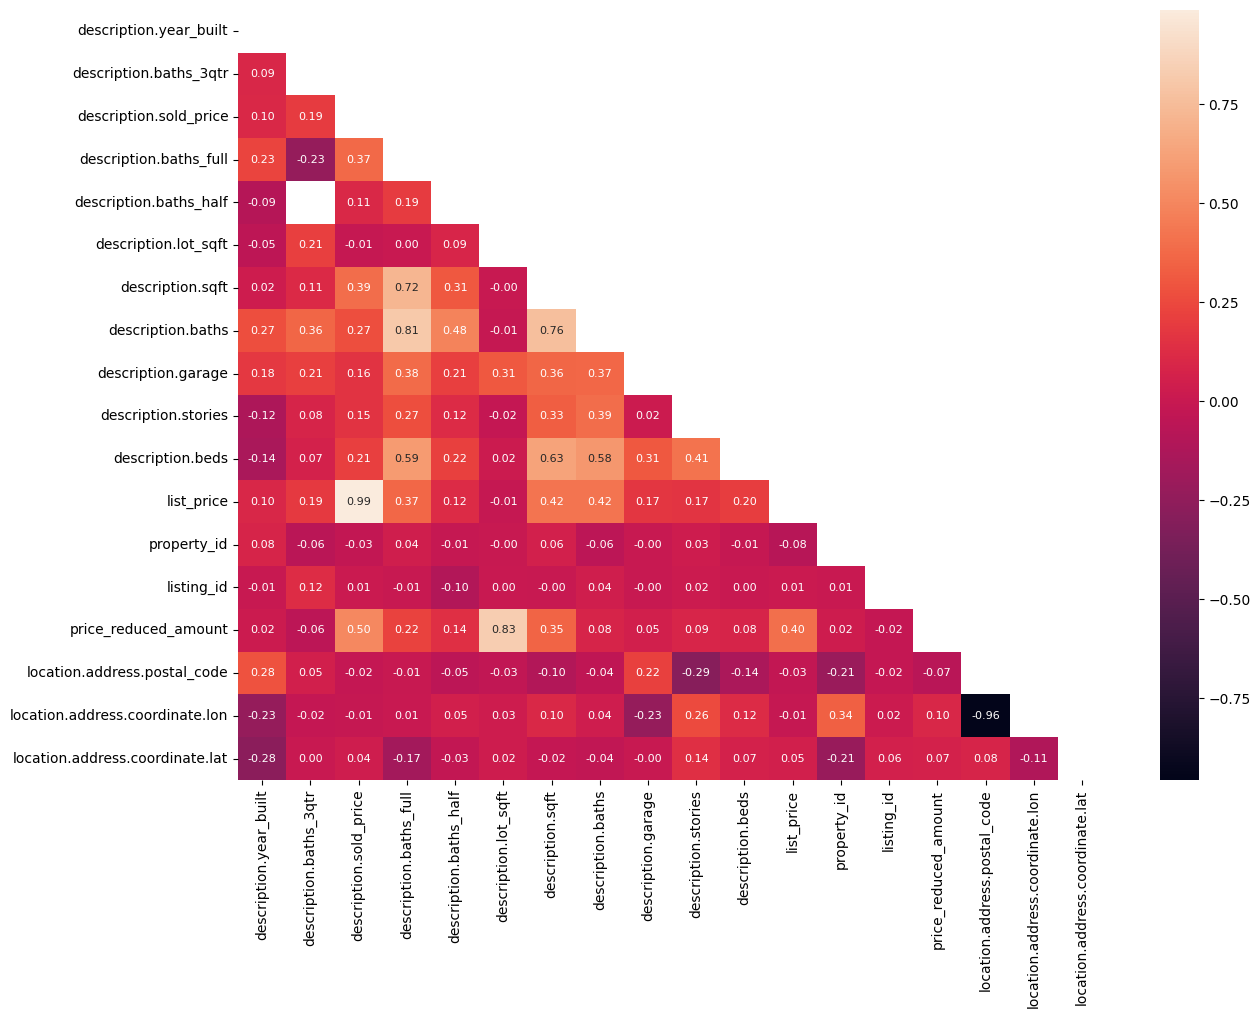

In [ ]:
# Correlation heatmap of numerical
plt.figure(figsize=(14, 10))
sns.heatmap(
    housingData[numerical_cols].corr(),
    annot=True,
    annot_kws={'size':8},
    fmt=".2f",
    mask=np.triu(np.ones_like(housingData[numerical_cols].corr(), dtype=bool))
)

# Exploring "categorical" columns

In [151]:
dropKeys = []

In [152]:
# Explore data some more

print(housingData['status'].unique())
# Only sold listings in data, redundant column, drop
dropKeys.append('status')

print(housingData['list_date'].unique())
# Convert to datetime

print(housingData['description.sold_date'].unique())
# Convert to datetime

['sold']
['2023-12-19T18:08:22.000000Z' '2023-11-10T14:20:36.000000Z'
 '2023-07-05T16:47:40.000000Z' ... '2023-01-24T18:27:46Z'
 '2023-03-24T12:27:42Z' '2023-04-20T17:26:52Z']
['2024-01-16' '2024-01-12' '2024-01-11' '2024-01-10' '2024-01-09'
 '2024-01-08' '2024-01-05' '2024-01-04' '2024-01-03' '2024-01-02'
 '2024-01-01' '2023-12-30' '2023-12-29' '2024-01-07' '2023-12-28'
 '2023-12-27' '2023-12-26' '2023-12-22' '2023-12-21' '2023-12-20'
 '2023-12-18' '2023-12-15' '2023-12-13' '2023-12-11' '2023-12-08'
 '2023-12-06' '2023-12-04' '2023-12-01' '2023-11-30' '2023-11-27'
 '2023-11-21' '2023-11-20' '2023-11-16' '2023-11-15' '2023-11-10'
 '2023-11-09' '2023-11-07' '2023-11-03' '2023-11-02' '2023-11-01'
 '2023-10-31' '2023-10-30' '2023-10-26' '2023-10-25' '2023-12-23'
 '2023-12-19' '2023-12-14' '2023-12-12' '2023-12-05' '2023-11-29'
 '2023-11-22' '2023-09-29' '2023-08-23' '2023-07-24' '2023-12-07'
 '2023-11-19' '2023-10-15' '2023-09-28' '2023-09-27' '2023-09-25'
 '2023-09-22' '2023-08-18' '2023

In [153]:
print(housingData['description.type'].value_counts())
# Combine low freq occurances to other

print(housingData['description.sub_type'].value_counts())
# minimal information column, drop
dropKeys.append('description.sub_type')

description.type
single_family                  4514
condos                          656
townhomes                       486
multi_family                    486
land                            316
mobile                          146
condo                            52
apartment                        20
other                            10
duplex_triplex                    5
condo_townhome_rowhome_coop       5
Name: count, dtype: int64
description.sub_type
condo        676
townhouse    496
Name: count, dtype: int64


In [154]:
print(housingData['location.address.state'].value_counts())

print(housingData['location.address.state_code'].value_counts())

# Redundant columns, can drop state code
dropKeys.append('location.address.state_code')



location.address.state
Alabama           210
Michigan          210
Wisconsin         210
Washington        210
Virginia          210
Rhode Island      210
Pennsylvania      210
Oregon            210
Oklahoma          210
Ohio              210
New York          210
Nevada            210
New Jersey        210
Nebraska          210
North Carolina    210
Arkansas          210
Minnesota         210
Maryland          210
Georgia           210
Arizona           210
California        210
Colorado          210
Connecticut       210
Delaware          210
Massachusetts     210
Florida           210
Iowa              210
Indiana           210
Kentucky          210
West Virginia     204
Illinois          170
South Carolina    160
Tennessee          80
Hawaii              6
New Hampshire       6
Name: count, dtype: int64
location.address.state_code
AL    210
MI    210
WI    210
WA    210
VA    210
RI    210
PA    210
OR    210
OK    210
OH    210
NY    210
NV    210
NJ    210
NE    210
NC    210
AR 

In [155]:
print(housingData['location.address.city'].value_counts())
# combine low freq cities?

location.address.city
Montgomery     210
Raleigh        210
Frankfort      210
Harrisburg     210
Lansing        210
              ... 
Alexander        2
Old Hickory      2
Tolleson         1
Hermitage        1
Galloway         1
Name: count, Length: 84, dtype: int64


In [156]:
print(housingData['location.address.line'].value_counts())
# drop column, cant really use.
dropKeys.append('location.address.line')


location.address.line
565 W Elliott Ave        10
140th St                  7
8108 Harps Mill Rd        5
7275 Berwick Rd           5
9422 Creek Summit Cir     5
                         ..
1515 Greenville Ave       1
5914 Churchill St         1
2057 Fairmount Ave        1
3301 Ward Rd              1
501 Moorfield Ln          1
Name: count, Length: 1471, dtype: int64


In [157]:
# Drop keys
dropKeys

['status',
 'description.sub_type',
 'location.address.state_code',
 'location.address.line']

In [158]:
housingData.drop(columns=dropKeys,inplace=True)

### Dealing with Tags

Consider the fact that with tags, there are a lot of categorical variables.
- How many columns would we have if we OHE tags, city and state?
- Perhaps we can get rid of tags that have a low frequency.

In [ ]:
# OHE categorical variables/ tags here
# tags will have to be done manually

### Dealing with Cities

- Sales will vary drastically between cities and states.  Is there a way to keep information about which city it is without OHE?
- Could we label encode or ordinal encode?  Yes, but this may have undesirable effects, giving nominal data ordinal values.
- What we can do is use our training data to encode the mean sale price by city as a feature (a.k.a. Target Encoding)
    - We can do this as long as we ONLY use the training data - we're using the available data to give us a 'starting guess' of the price for each city, without needing to encode city explicitly
- If you replace cities or states with numerical values (like the mean price), make sure that the data is split so that we don't leak data into the training selection. This is a great time to train test split. Compute on the training data, and join these values to the test data
- Note that you *may* have cities in the test set that are not in the training set. You don't want these to be NA, so maybe you can fill them with the overall mean

In [ ]:
# perform train test split here
# do something with state and city

from sklearn.model_selection import train_test_split

# Splitting training and testing data 
X_train, X_test, y_train, y_test = train_test_split(housingData.drop(['description.sold_price']), housingData['description.sold_price'], test_size=0.2, random_state=42)

In [103]:
# Get average sale price of each city and state
housingData['location.address.city'].unique()
housingData['location.address.state'].unique()

array(['Alabama', 'Arkansas', 'Arizona', 'California', 'Colorado',
       'Connecticut', 'Delaware', 'Florida', 'Georgia', 'Hawaii', 'Iowa',
       'Illinois', 'Indiana', 'Kentucky', 'Massachusetts', 'Maryland',
       'Michigan', 'Minnesota', 'North Carolina', 'Nebraska',
       'New Hampshire', 'New Jersey', 'Nevada', 'New York', 'Ohio',
       'Oklahoma', 'Oregon', 'Pennsylvania', 'Rhode Island',
       'South Carolina', 'Tennessee', 'Virginia', 'Washington',
       'Wisconsin', 'West Virginia'], dtype=object)

In [104]:
housingData['location.address.state_code'].unique()

array(['AL', 'AR', 'AZ', 'CA', 'CO', 'CT', 'DE', 'FL', 'GA', 'HI', 'IA',
       'IL', 'IN', 'KY', 'MA', 'MD', 'MI', 'MN', 'NC', 'NE', 'NH', 'NJ',
       'NV', 'NY', 'OH', 'OK', 'OR', 'PA', 'RI', 'SC', 'TN', 'VA', 'WA',
       'WI', 'WV'], dtype=object)

## Extra Data - STRETCH

> This doesn't need to be part of your Minimum Viable Product (MVP). We recommend you write a functional, basic pipeline first, then circle back and join new data if you have time

> If you do this, try to write your downstream steps in a way it will still work on a dataframe with different features!

- You're not limited to just using the data provided to you. Think/ do some research about other features that might be useful to predict housing prices. 
- Can you import and join this data? Make sure you do any necessary preprocessing and make sure it is joined correctly.
- Example suggestion: could mortgage interest rates in the year of the listing affect the price? 

In [ ]:
# import, join and preprocess new data here

## EDA/ Visualization

Remember all of the EDA that you've been learning about?  Now is a perfect time for it!
- Look at distributions of numerical variables to see the shape of the data and detect outliers.    
    - Consider transforming very skewed variables
- Scatterplots of a numerical variable and the target go a long way to show correlations.
- A heatmap will help detect highly correlated features, and we don't want these.
    - You may have too many features to do this, in which case you can simply compute the most correlated feature-pairs and list them
- Is there any overlap in any of the features? (redundant information, like number of this or that room...)

In [ ]:
# perform EDA here

## Scaling and Finishing Up

Now is a great time to scale the data and save it once it's preprocessed.
- You can save it in your data folder, but you may want to make a new `processed/` subfolder to keep it organized